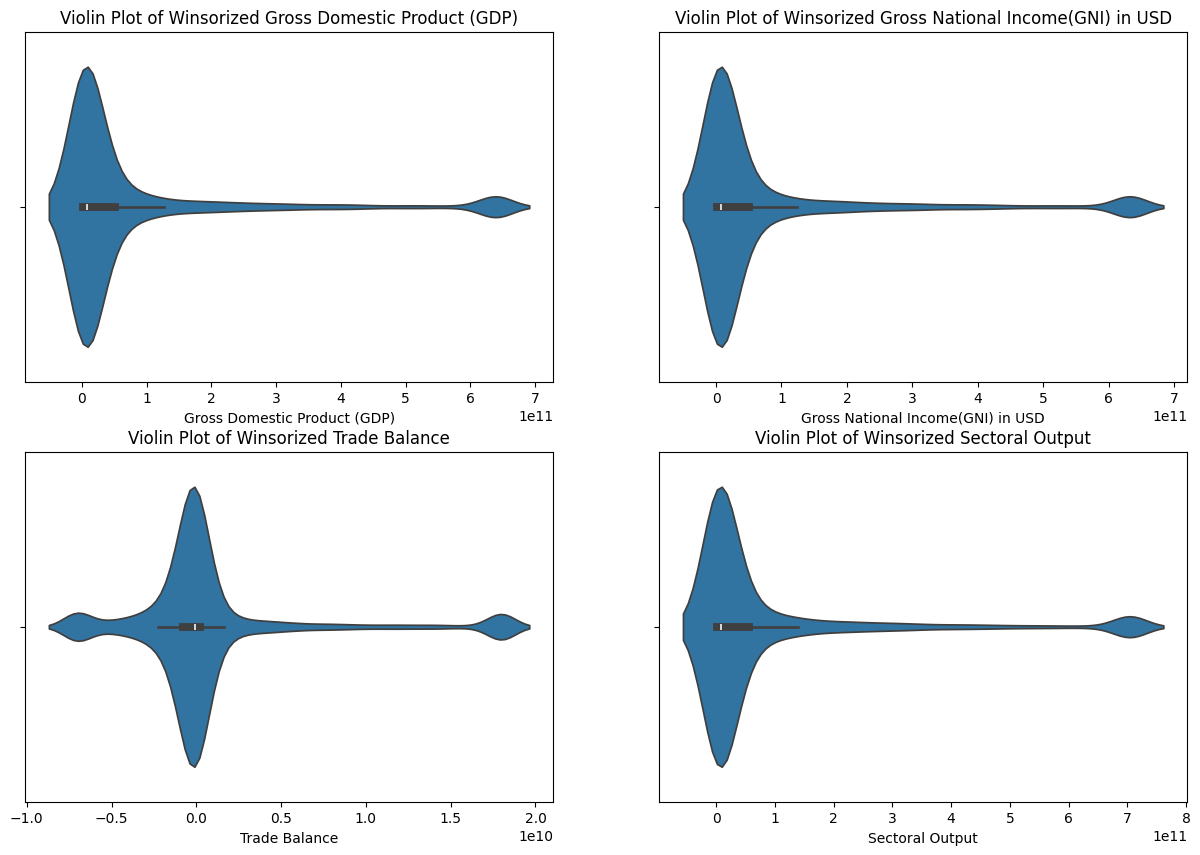

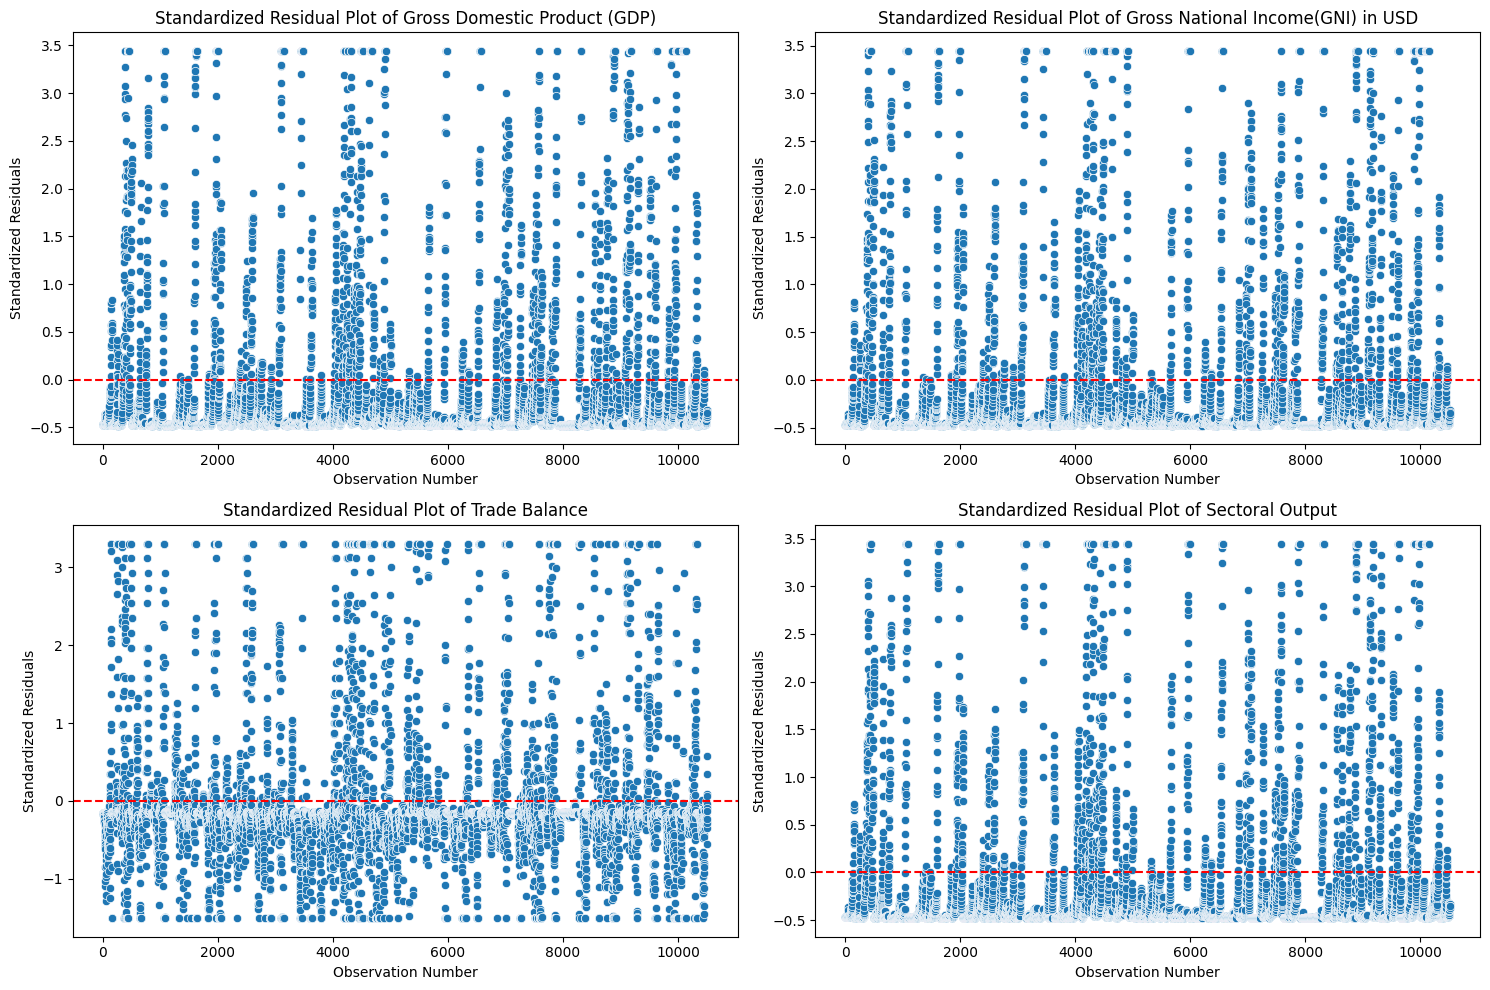

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

# Load your dataset
file_path = r'C:\Users\asus\Desktop\Assignment\Second Assignment\Mod Global Economy Indicator 1.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)
# Apply winsorization to the relevant columns to trim extreme outliers
# Here we are trimming 5% from both tails of all the distributions
columns_to_winsorize = ['Gross Domestic Product (GDP)', 'Gross National Income(GNI) in USD',
                        'Trade Balance', 'Sectoral Output']
for column in columns_to_winsorize:
    data[column] = winsorize(data[column], limits=[0.05, 0.05])
# Now, let's create violin plots for the winsorized data
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_winsorize, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(data=data, x=column)
    plt.title(f'Violin Plot of Winsorized {column}')
# Standardizing the data
data_standardized = data.copy()
for column in columns_to_winsorize:
    data_standardized[column] = (data[column] - data[column].mean()) / data[column].std()


# Now, let's create standardized residual plots for the standardized data
plt.figure(figsize=(15, 10))


for i, column in enumerate(columns_to_winsorize, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=np.arange(len(data_standardized)), y=data_standardized[column])
    plt.axhline(0, color='red', linestyle='--')  # Add a reference line at 0 for the mean
    plt.title(f'Standardized Residual Plot of {column}')
    plt.xlabel('Observation Number')
    plt.ylabel('Standardized Residuals')




plt.tight_layout()
plt.show()
